# Импортируем библиотеки

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from operator import attrgetter

%matplotlib inline

# Считываем данные

In [2]:
customers = pd.read_csv('~/data_for_1st_project/olist_customers_dataset.csv')
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [3]:
orders = pd.read_csv('~/data_for_1st_project/olist_orders_dataset.csv',
                     parse_dates=['order_purchase_timestamp',
                                  'order_approved_at',
                                  'order_delivered_carrier_date',
                                  'order_delivered_customer_date',
                                  'order_estimated_delivery_date'])
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [4]:
items = pd.read_csv('~/data_for_1st_project/olist_order_items_dataset.csv',
                    parse_dates=['shipping_limit_date'])
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


# Разведывательный анализ данных

## Таблица клиентов

In [213]:
customers['customer_unique_id'].nunique()

96096

Всего у нас покупали 96096 человек

In [215]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Пропущенных значений нет

In [217]:
customers.duplicated().sum()

0

Дубликатов нет

In [5]:
customers['customer_city'].value_counts()

sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
central               1
caldas brandao        1
cacaulandia           1
entre folhas          1
doutor ulysses        1
Name: customer_city, Length: 4119, dtype: int64

In [6]:
customers['customer_city'].value_counts().max() / customers['customer_city'].value_counts().sum()

0.15627356925211935

Всего наши клиенты есть в 4119 городах. При этом в Сан-Пауло зарегестрированы 15540 наших клиентов, то есть 15%.

In [7]:
customers['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

In [8]:
customers['customer_state'].value_counts().shape

(27,)

In [9]:
customers['customer_state'].value_counts().max() / customers['customer_state'].value_counts().sum()

0.41980671956235355

Наши клиенты есть в 27 штатах, при этом 41% находится в штате SP

## Таблица заказов

In [218]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Есть пропущенные значения в строках с датой подьверждения заказа, передачи курьеру, ожидаемого и реального времени доставки - неудивительно, ведь часть заказов отменяются

In [11]:
orders['order_id'].duplicated().sum()

0

Заказы в таблице не дублируются, значит в ней только актуальные данные о заказах в данный момент времени, а не полная информация (когда заказ был сделан, когда он был обработан, когда по нему был выставлен счет и т.д.)  

In [220]:
orders.shape

(99441, 8)

Всего был оформлен 99 441 заказ

## Таблица товаров

In [222]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Пропущенных заказов нет

In [223]:
items.duplicated().sum()

0

Дубликатов нет

In [12]:
items['product_id'].value_counts().head(10)

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: product_id, dtype: int64

Топ-10 самых популярных товаров

In [13]:
items['seller_id'].value_counts().head(10)

6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
955fee9216a65b617aa5c0531780ce60    1499
1025f0e2d44d7041d6cf58b6550e0bfa    1428
7c67e1448b00f6e969d365cea6b010ab    1364
ea8482cd71df3c1969d7b9473ff13abc    1203
7a67c85e85bb2ce8582c35f2203ad736    1171
Name: seller_id, dtype: int64

Топ-10 поставщиков

In [227]:
items['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

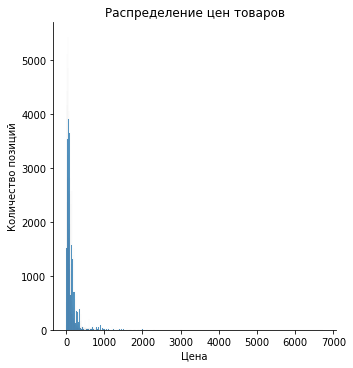

In [226]:
ax_price = sns.displot(items['price'])
ax_price.set(title='Распределение цен товаров', 
             xlabel='Цена',
             ylabel='Количество позиций')

Магазин продает в основном недорогие товары, однако есть выбросы - очень дорогие позиции

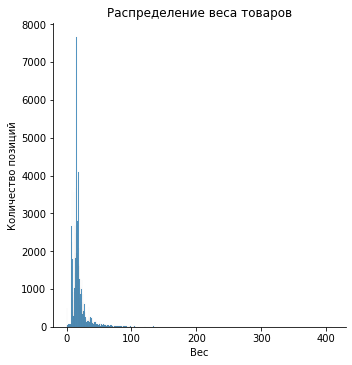

In [229]:
ax_freight = sns.displot(items['freight_value'])
ax_freight.set(title='Распределение веса товаров', 
             xlabel='Вес',
             ylabel='Количество позиций')

In [15]:
items['freight_value'].describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

Ситуация как и с ценой - по большей части, малогабаритные позиции, но есть и сильные выбросы

# Задание 1

>***Сколько у нас пользователей, которые совершили покупку только один раз?***

Для начала нужно понять, что значит совершить покупку один раз. Если брать в расчет все созданные заказы, мы также учтем отмененные и те, статус которых неизвестен. Они не несут в себе ценности, так как если человек сделал только один заказ и отменил его, мы не можем назвать его нашим клиентом. Таким образом, разумно будет не включать в анализ такие заказы.  
Также есть вариант не включать в анализ те заказы, которые еще не были доставлены, так как они также могут быть отменены.  
Однако отменяются не все заказы, и чтобы понять, стоит ли нам исключать из анализа данные по заказам в работе, нужно понять, какой процент заказов отменяется.

In [16]:
orders[orders['order_status'].isin(['canceled', 'unavaliable'])]['order_id'].count() / orders['order_id'].count() * 100

0.6285133898492574

Отменяются только 0.6% заказов, таким образом, мы не получим сильного искажения, если все-таки включим в анализ заказы в обработке.   
Также стоит исключить заказы со статусом created - они созданы, но оплата по ним еще не получена

In [17]:
not_used_orders = orders[orders['order_status'].isin(['canceled', 'unavailable', 'created'])]['order_id']
not_used_orders

266      8e24261a7e58791d10cb1bf9da94df5c
397      1b9ecfe83cdc259250e1a8aca174f0ad
586      c272bcd21c287498b4883c7512019702
613      714fb133a6730ab81fa1d3c1b2007291
687      37553832a3a89c9b2db59701c357ca67
                       ...               
99252    aaab15da689073f8f9aa978a390a69d1
99283    3a3cddda5a7c27851bd96c3313412840
99347    a89abace0dcc01eeb267a9660b5ac126
99348    a69ba794cc7deb415c3e15a0a3877e69
99415    5fabc81b6322c8443648e1b21a6fef21
Name: order_id, Length: 1239, dtype: object

1. Фильтруем данные от отмененных заказов, чтобы они не учитывались;  
2. Джойним данные по заказам с данными по пользователям, чтобы получить уникальный идентификатор пользователя для каждого закакза;  
3. Группируем по уникальному идектификатору пользователя;  
4. Аггрегируем функцией "Count" чтобы получить количество заказов на каждого пользователя;  
5. Сбрасываем индекс для удобства;  
6. Переименовываем колонку с количеством заказов.

In [18]:
task_1 = orders[orders['order_id'].isin(not_used_orders) == 0] \
            .merge(customers[['customer_id', 'customer_unique_id']], how='left', on='customer_id') \
            .groupby('customer_unique_id')['order_id'] \
            .agg(['count']) \
            .reset_index() \
            .rename(columns={'count':'orders_count'})
task_1

,customer_unique_id,orders_count
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,1
94982,fffea47cd6d3cc0a88bd621562a9d061,1
94983,ffff371b4d645b6ecea244b27531430a,1
94984,ffff5962728ec6157033ef9805bacc48,1


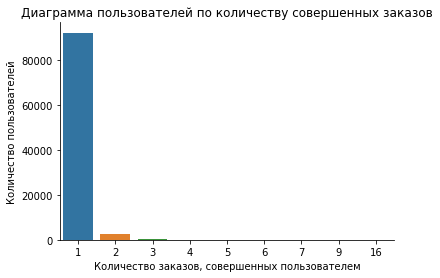

In [19]:
ax = sns.countplot(data=task_1, x='orders_count')
ax.set_xlabel('Количество заказов, совершенных пользователем')
ax.set_ylabel('Количество пользователей')
ax.set_title('Диаграмма пользователей по количеству совершенных заказов')
sns.despine()

Можно видеть, что большинство клиентов совершили только одинн заказ, что сильно оттеняет остальных на графике (в частности тех, кто сделал больше 3 заказов) и их сложно рассмотреть
Для решения этой проблемы имеет смысл исключить тех, кто сделал меньше 4х заказов из графика


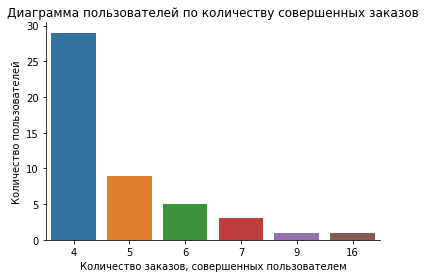

In [20]:
ax1 = sns.countplot(data=task_1[task_1['orders_count']>3], x='orders_count')
ax1.set_xlabel('Количество заказов, совершенных пользователем')
ax1.set_ylabel('Количество пользователей')
ax1.set_title('Диаграмма пользователей по количеству совершенных заказов')
sns.despine()

1. Группируем полученный датафрейм по количеству заказов;  
2. Аггрегируем функцией "Count" чтобы получить количество пользователей, сделавших то или количество заказов;  
3. Сбрасывем индекс.

In [21]:
task_1_itog = task_1.groupby('orders_count')['customer_unique_id'] \
                    .agg(['count']) \
                    .reset_index() \
                    .rename(columns={'count': 'users_count'})
task_1_itog

,orders_count,users_count
0,1,92099
1,2,2651
2,3,188
3,4,29
4,5,9
5,6,5
6,7,3
7,9,1
8,16,1


Ответ -- 92,099 пользователя.  
Проверим, насколько полученные данные могут отклоняться от реальной картины из-за погрешности, которую мы допустили (включение в анализ заказов в работе)

Подготавливаем датафрейм с1, где будет информация обо всех заказах, кроме тех, которые решили не учитывать и джойним ее с датафреймом с айди пользователей, сделавших только 1 заказ.  
Далее фильтруем тех, чей заказ в процессе и считаем их количество

In [22]:
c1 = customers[['customer_id', 'customer_unique_id']] \
    .merge(orders[orders['order_id'].isin(not_used_orders) == 0][['customer_id', 'order_status']], 
           on='customer_id', how='right')
task_1[task_1['orders_count'] == 1] \
    .merge(c1, on='customer_unique_id', how='left') \
    .query('order_status != "delivered"')['customer_unique_id'] \
    .count()

1622

Получилось 1622. Так как отменяется, как мы уже выяснили, 0.6% заказов, нужно найти 0.6% от 1622.

In [23]:
0.006 * 1622

9.732

Таким образом, опираясь на посчитанную погрешность,будут отменены примерно 10 заказов.

# Ответ: 1 раз заказ совершили 92,102 пользователя (92,092 с поправкой на возможную отмену)

# Задание 2

>***Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?***

Для начала нужно определить, что значит недоставленные заказы. В расчет возьмем заказы со статусом "canceled" и "unavailable", так как остальные, не считая доставленных, находятся в обработке и будут доставлены.

In [204]:
task_2 = orders[['order_id', 'order_status', 'order_purchase_timestamp']]
task_2 = task_2[task_2['order_status'].isin(['canceled', 'unavailable'])]

Выводим отдельными колонками год и месяц оформления заказа

In [205]:
task_2['year'] = task_2['order_purchase_timestamp'].dt.year

In [206]:
task_2['month'] = task_2['order_purchase_timestamp'].dt.month

In [207]:
task_2

,order_id,order_status,order_purchase_timestamp,year,month
266,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017,11
397,1b9ecfe83cdc259250e1a8aca174f0ad,canceled,2018-08-04 14:29:27,2018,8
586,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018,1
613,714fb133a6730ab81fa1d3c1b2007291,canceled,2018-01-26 21:34:08,2018,1
687,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017,8
...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,unavailable,2018-01-16 14:27:59,2018,1
99283,3a3cddda5a7c27851bd96c3313412840,canceled,2018-08-31 16:13:44,2018,8
99347,a89abace0dcc01eeb267a9660b5ac126,canceled,2018-09-06 18:45:47,2018,9
99348,a69ba794cc7deb415c3e15a0a3877e69,unavailable,2017-08-23 16:28:04,2017,8


Группируем по году, месяцу и статусу   
Аггрегируем по количеству   
Еще раз группируем по статусу заказа
Аггрегируем уже по среднему количеству

In [210]:
task_2_itog = task_2.groupby(['year', 'month', 'order_status'])['order_id'] \
                    .agg(['count']) \
                    .reset_index() \
                    .rename(columns={'count': 'orders_count'}) \
                    .groupby('order_status')['orders_count'] \
                    .agg(['mean']) \
                    .rename(columns={'mean': 'mean_count_per_month'}) \
                    .reset_index()
task_2_itog

,order_status,mean_count_per_month
0,canceled,26.041667
1,unavailable,29.000000


Визуализируем эту таблицу

Text(0, 0.5, 'Среднее количество в месяц')

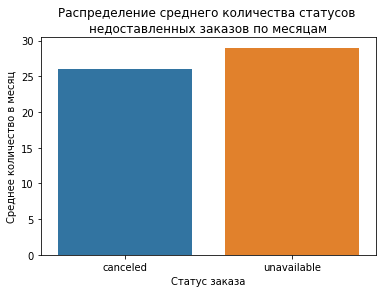

In [156]:
ax_not_delivered = sns.barplot(data=task_2_itog, x='order_status', y='mean_count_per_month')
ax_not_delivered.set_title('Распределение среднего количества статусов \nнедоставленных заказов по месяцам')
ax_not_delivered.set_xlabel('Статус заказа')
ax_not_delivered.set_ylabel('Среднее количество в месяц')

Таким образом, в среднем в месяц отменяются 26 заказов, и 29 заказов получают статус unavailable

# Задание 3


> ***По каждому товару определить, в какой день недели товар чаще всего покупается.***

Создадим новый датафрейм -- из данных о заказах возьмем номер заказа и время оформления, из данных о товаре возьмем ID товара и ID заказа. Таким образом, новый датафрейм содержит информацию о том, какой продукт к какому заказу относится и когда этот заказ был сделан.
Также выкинем из датафрейма информацию об отмененных заказах, о тех, информация о которых недоступна и от тех, оплата по каторым еще не получена - неизвестно, насколько они отраждают реальную картину - они могли быть сделаны по ошибке и т.д.

In [158]:
task_3 = orders[orders['order_id'].isin(not_used_orders)==0][['order_id', 'order_purchase_timestamp']] \
            .merge(items[['order_id', 'product_id']], on='order_id', how='left')
task_3

,order_id,order_purchase_timestamp,product_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e
...,...,...,...
112099,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,f1d4ce8c6dd66c47bbaa8c6781c2a923
112100,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,b80910977a37536adeddd63663f916ad
112101,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4
112102,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4


Отдельным столбцом выведем информацию о том, в какой день недели был совершен заказ. Однако использованная функция возвращает не название, а номер дня недели, начиная с 0 - понедельник. Это не очень удобно, поэтому переведем день недели в текстовую форму, написав для этого функцию.

In [159]:
task_3['day_of_week_number'] = task_3['order_purchase_timestamp'].apply(pd.Timestamp.weekday)

In [161]:
def define_weekday(day_number):
    days_list = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
    return days_list[day_number]

In [162]:
task_3['day_of_week'] = task_3['day_of_week_number'].apply(define_weekday)
task_3

,order_id,order_purchase_timestamp,product_id,day_of_week_number,day_of_week
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,0,Понедельник
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,1,Вторник
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,2,Среда
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,5,Суббота
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,1,Вторник
...,...,...,...,...,...
112099,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,f1d4ce8c6dd66c47bbaa8c6781c2a923,1,Вторник
112100,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,b80910977a37536adeddd63663f916ad,6,Воскресенье
112101,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4,0,Понедельник
112102,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4,0,Понедельник


Теперь сгруппируем датафрейм по ID товара и саггрегируем по модальному значению. Таким образом, для каждого товара получим день недели, когда он был заказан чаще всего. Некоторые товары имеют 2 самых частых дня заказа. Для этого применим метод explode, чтобы разбить список самых частых дней недели на несколько строчек, чтобы можно было построить график и таблица имела более однородный вид.

In [163]:
task_3_1 = task_3.groupby('product_id').agg({'day_of_week': pd.Series.mode}).explode(column='day_of_week').reset_index()
task_3_1

,product_id,day_of_week
0,00066f42aeeb9f3007548bb9d3f33c38,Воскресенье
1,00088930e925c41fd95ebfe695fd2655,Вторник
2,0009406fd7479715e4bef61dd91f2462,Четверг
3,000b8f95fcb9e0096488278317764d19,Пятница
4,000b8f95fcb9e0096488278317764d19,Среда
...,...,...
42442,fff6177642830a9a94a0f2cba5e476d1,Суббота
42443,fff81cc3158d2725c0655ab9ba0f712c,Понедельник
42444,fff9553ac224cec9d15d49f5a263411f,Пятница
42445,fffdb2d0ec8d6a61f0a0a0db3f25b441,Вторник


Таким образом, получаем итоговый датафрейм, который и является ответом на задание. Для более легкого восприятия можно его визуализировать. Например, посмотреть по каждому дню недели, для скольки товаров он самый популярный

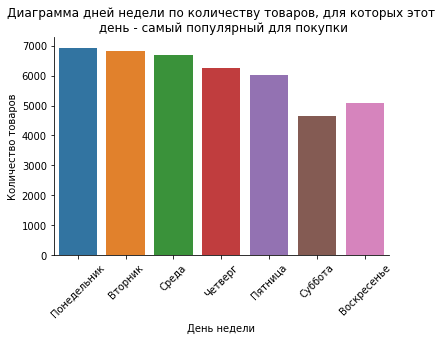

In [165]:
ax2 = sns.countplot(data=task_3_1, x='day_of_week', 
                   order=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])
ax2.set_xlabel('День недели')
ax2.set_ylabel('Количество товаров')
ax2.set_title('Диаграмма дней недели по количеству товаров, для которых этот\n день - самый популярный для покупки')
plt.xticks(rotation=45)
sns.despine()

Можно сравнить этот график с графиком купленных товаров по дням недели


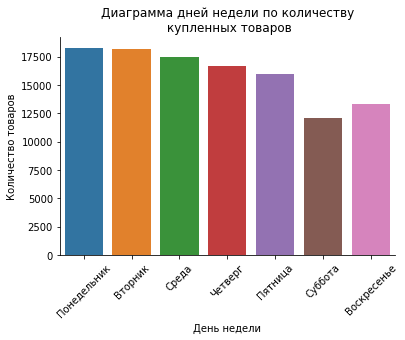

In [166]:
ax3 = sns.countplot(data=task_3, x='day_of_week',
             order=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])
ax3.set_xlabel('День недели')
ax3.set_ylabel('Количество товаров')
ax3.set_title('Диаграмма дней недели по количеству\n купленных товаров')
plt.xticks(rotation=45)
sns.despine()

Можно видеть, что несмотря на отличия чисел, по форме эти графики почти идентичны.   
Можно заключить, что больше всего у нас закакзывают в середине недели, а меньше всего - в субботу. Это довольно интересная статистика, однако без информации о продуктах, которые мы продаем, сделать из этого более подробные и точные выводы невозможно.

# Задание 4

>***Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.***

Подготовим датафрейм - соединим данные о клиентах, в которых нам нужен уникальный идентифиакатор пользователя и данные о заказах, в которых нам нужна дата оформления заказа. Также не берем заказы со статусом canceled, unavailable и created - они не сожержат достоверную информацию о покупке

In [37]:
task_4 = orders[orders['order_id'].isin(not_used_orders)==0] \
                [['customer_id', 'order_id', 'order_purchase_timestamp']] \
                .merge(customers[['customer_id', 'customer_unique_id']], on='customer_id', how='left') \
                [['customer_unique_id', 'order_purchase_timestamp']]
task_4

,customer_unique_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39
...,...,...
98197,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05
98198,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58
98199,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43
98200,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27


Так как нас не интересует таймстамп, только год/месяц, добавим эту колонку отдельно для удобства группировки

In [38]:
task_4['date'] = task_4['order_purchase_timestamp'].dt.to_period('M')
task_4

,customer_unique_id,order_purchase_timestamp,date
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02
...,...,...,...
98197,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,2017-03
98198,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,2018-02
98199,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,2017-08
98200,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,2018-01


Теперь сгруппируем по пользователю, году и месяцу и саггрегируем по количеству заказов

In [39]:
task_4_1 = task_4.groupby(['customer_unique_id', 'date'])['order_purchase_timestamp'] \
                .agg(['count']) \
                .reset_index() \
                .rename(columns={'count': 'orders_per_month'})
task_4_1

,customer_unique_id,date,orders_per_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1
...,...,...,...
96859,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1
96860,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1
96861,ffff371b4d645b6ecea244b27531430a,2017-02,1
96862,ffff5962728ec6157033ef9805bacc48,2018-05,1


Теперь нужно добавить в датафрейм информацию о том, сколько недель в том или ином месяце. Для этого количество дней разделим на 7.

In [40]:
task_4_1['days_in_month'] = task_4_1['date'].dt.daysinmonth

In [41]:
task_4_1['weeks_in_month'] = task_4_1['days_in_month'] / 7

In [42]:
task_4_1

,customer_unique_id,date,orders_per_month,days_in_month,weeks_in_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,31,4.428571
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,31,4.428571
2,0000f46a3911fa3c0805444483337064,2017-03,1,31,4.428571
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,31,4.428571
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,30,4.285714
...,...,...,...,...,...
96859,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1,30,4.285714
96860,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1,31,4.428571
96861,ffff371b4d645b6ecea244b27531430a,2017-02,1,28,4.000000
96862,ffff5962728ec6157033ef9805bacc48,2018-05,1,31,4.428571


Теперь разделим количество заказов за месяц на количество недель и получим, сколько заказов в среднем было совершено за неделю

In [43]:
task_4_1['orders_per_week'] = task_4_1['orders_per_month'] / task_4_1['weeks_in_month']

In [44]:
task_4_1

,customer_unique_id,date,orders_per_month,days_in_month,weeks_in_month,orders_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,31,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,31,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,1,31,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,31,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,30,4.285714,0.233333
...,...,...,...,...,...,...
96859,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1,30,4.285714,0.233333
96860,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1,31,4.428571,0.225806
96861,ffff371b4d645b6ecea244b27531430a,2017-02,1,28,4.000000,0.250000
96862,ffff5962728ec6157033ef9805bacc48,2018-05,1,31,4.428571,0.225806


Теперь оставим только нужные колонки и отсортируем датафрейм по возрастанию даты и идентификатору пользователя иаким образом получаем ответ

In [45]:
task_4_itog = task_4_1[['customer_unique_id', 'date', 'orders_per_week']].sort_values(by=['date', 'customer_unique_id'])
task_4_itog

,customer_unique_id,date,orders_per_week
49701,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,0.233333
69648,b7d76e111c89f7ebf14761390f0f7d17,2016-09,0.233333
74,0032c76b20340da25249092a268ce66c,2016-10,0.225806
743,01f156677184504063bd19739f924af1,2016-10,0.225806
1171,0313291a6f4f16df04dcf819d88c38ef,2016-10,0.225806
...,...,...,...
96786,ffc4e1cd8aa220763480d0a18157c45d,2018-08,0.225806
96817,ffe204b1bb8026741b839085b2fd10f2,2018-08,0.225806
96838,ffec490ab531184a483efe2eedd68908,2018-08,0.225806
96854,fff96bc586f78b1f070da28c4977e810,2018-08,0.225806


Так же было бы интересно посмотреть, как распределяется среднее количество заказов в неделю. Из предыдущих шагов мы знаем, что большинство пользователей совершили в магазине только один заказ, поэтому абсолютное большинство будет в районе 0.2. Проверим это

Text(0.5, 1.0, 'Распределение среднего количества заказов в неделю \nпо пользователям')

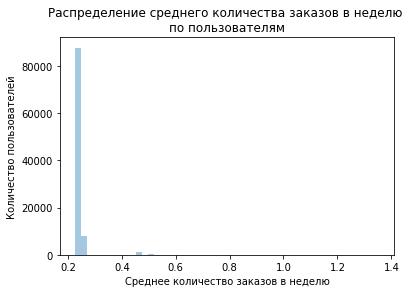

In [168]:
ax4 = sns.distplot(task_4_itog['orders_per_week'], kde=False)
ax4.set_ylabel('Количество пользователей')
ax4.set_xlabel('Среднее количество заказов в неделю')
ax4.set_title('Распределение среднего количества заказов в неделю \nпо пользователям')

Действительно, так и есть. Присутствуют только 2 небольших всплеска около 0.5.

# Задание 5

>***Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.***

Отбрасываем заказы, не представляющие ценной информации
Составляем датафрейм с месяцем первой покупки каждого пользователя

In [170]:
first_buy = customers[['customer_unique_id', 
                       'customer_id']].merge(orders[orders['order_id'].isin(not_used_orders)==0][['customer_id', 
                                                                                       'order_purchase_timestamp']], 
                                                       on='customer_id', 
                                                       how='right')[['customer_unique_id', 'order_purchase_timestamp']]

first_buy['month'] = first_buy['order_purchase_timestamp'].dt.to_period('M')
first_buy = first_buy.groupby('customer_unique_id', as_index=False).agg({'month': 'min'})
first_buy

,customer_unique_id,month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11
...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06
94982,fffea47cd6d3cc0a88bd621562a9d061,2017-12
94983,ffff371b4d645b6ecea244b27531430a,2017-02
94984,ffff5962728ec6157033ef9805bacc48,2018-05


Проверим, сколько у нас когорт

In [171]:
first_buy['month'].nunique()

23

Посмотрим, сколько новых пользователей приходило каждый месяц

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'количество новых пользователей')

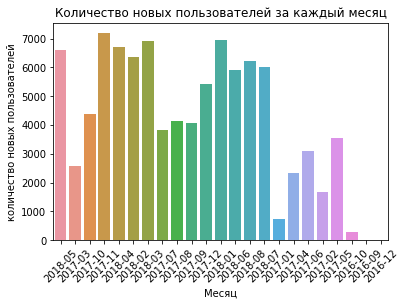

In [172]:
ax5 = sns.countplot(first_buy['month'])
plt.xticks(rotation=45)
ax5.set_title('Количество новых пользователей за каждый месяц')
ax5.set_xlabel('Месяц')
ax5.set_ylabel('количество новых пользователей')

Видно, что последнее время новых пользователей стало заметно меньше - возможно, стоит увеличить рекламные бюджеты

Составим датафрейм с датами всех заказов каждого пользователя

In [174]:
cust_cohort = orders[orders['order_id'].isin(not_used_orders)==0][['customer_id', 'order_purchase_timestamp']] \
                    .merge(customers[['customer_id', 'customer_unique_id']],
                           on='customer_id', 
                           how='left')[['customer_unique_id', 'order_purchase_timestamp']]

cust_cohort

,customer_unique_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39
...,...,...
98197,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05
98198,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58
98199,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43
98200,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27


Теперь мерджим эти два датафрейма

In [175]:
cust_cohort = cust_cohort.merge(first_buy, on='customer_unique_id', how='left')

In [176]:
cust_cohort.rename(columns={'month': 'cohort_month'}, inplace=True)

Переводим таймстампы плокупок в месяцы

In [177]:
cust_cohort['buy_month'] = cust_cohort['order_purchase_timestamp'].dt.to_period('M')
cust_cohort

,customer_unique_id,order_purchase_timestamp,cohort_month,buy_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-09,2017-10
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08,2018-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02,2018-02
...,...,...,...,...
98197,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,2017-03,2017-03
98198,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,2018-02,2018-02
98199,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,2017-08,2017-08
98200,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,2018-01,2018-01


In [54]:
cust_cohort.drop(columns='order_purchase_timestamp', inplace=True)
cust_cohort

,customer_unique_id,cohort_month,buy_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-09,2017-10
1,af07308b275d755c9edb36a90c618231,2018-07,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,2018-02
...,...,...,...
98202,6359f309b166b0196dbf7ad2ac62bb5a,2017-03,2017-03
98203,da62f9e57a76d978d02ab5362c509660,2018-02,2018-02
98204,737520a9aad80b3fbbdad19b66b37b30,2017-08,2017-08
98205,5097a5312c8b157bb7be58ae360ef43c,2018-01,2018-01


Определяем количество уникальных пользователей, группируя по когорте и месяцу

In [183]:
cohorts = cust_cohort.groupby(['cohort_month', 'buy_month'], as_index=False) \
                        .agg({'customer_unique_id': pd.Series.nunique}) \
                        .rename(columns={'customer_unique_id': 'unique_users'})
cohorts

,cohort_month,buy_month,unique_users
0,2016-09,2016-09,2
1,2016-10,2016-10,290
2,2016-10,2017-04,1
3,2016-10,2017-07,1
4,2016-10,2017-09,1
...,...,...,...
215,2018-06,2018-08,16
216,2018-07,2018-07,6017
217,2018-07,2018-08,31
218,2018-08,2018-08,6209


Выведем информацию о том, сколько прошло времени между первым заказом и данным

In [188]:
cohorts['period_number'] = (cohorts.buy_month - cohorts.cohort_month).apply(attrgetter('n'))
cohorts

,cohort_month,buy_month,unique_users,period_number
0,2016-09,2016-09,2,0
1,2016-10,2016-10,290,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,1,11
...,...,...,...,...
215,2018-06,2018-08,16,2
216,2018-07,2018-07,6017,0
217,2018-07,2018-08,31,1
218,2018-08,2018-08,6209,0


Формируем сводную таблицу, строки - когорты, столбцы - период после прихода, значения - количество уникальных пользователй

In [191]:
cohort_matrix = cohorts.pivot_table(index='cohort_month',
                                     columns='period_number',
                                     values='unique_users')
cohort_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-09,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,290.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,752.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1690.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,2571.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,2325.0,14.0,5.0,4.0,7.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
2017-05,3541.0,17.0,17.0,14.0,11.0,12.0,15.0,5.0,9.0,9.0,9.0,12.0,9.0,1.0,7.0,8.0,NaN,NaN,NaN,NaN
2017-06,3102.0,14.0,11.0,12.0,8.0,12.0,11.0,7.0,4.0,7.0,10.0,10.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


Создадим переменную с размером каждой когорты

In [192]:
cohort_size = cohort_matrix.iloc[:,0]
cohort_size

cohort_month
2016-09       2.0
2016-10     290.0
2016-12       1.0
2017-01     752.0
2017-02    1690.0
2017-03    2571.0
2017-04    2325.0
2017-05    3541.0
2017-06    3102.0
2017-07    3822.0
2017-08    4130.0
2017-09    4075.0
2017-10    4392.0
2017-11    7188.0
2017-12    5437.0
2018-01    6951.0
2018-02    6356.0
2018-03    6931.0
2018-04    6698.0
2018-05    6586.0
2018-06    5920.0
2018-07    6017.0
2018-08    6209.0
Freq: M, Name: 0, dtype: float64

Считаем ретеншн - делим ячейки на размер когорты

In [194]:
retention_matrix = cohort_matrix.divide(cohort_size, axis = 0).mul(100).round(2)
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-09,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,100.0,NaN,NaN,NaN,NaN,NaN,0.34,NaN,NaN,0.34,NaN,0.34,NaN,0.34,NaN,0.34,NaN,0.34,0.69,0.69
2016-12,100.0,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,100.0,0.40,0.27,0.13,0.40,0.13,0.40,0.13,0.13,NaN,0.40,0.13,0.66,0.40,0.13,0.13,0.27,0.40,0.13,NaN
2017-02,100.0,0.24,0.30,0.12,0.41,0.12,0.24,0.18,0.12,0.18,0.12,0.30,0.12,0.18,0.12,0.06,0.06,0.24,NaN,NaN
2017-03,100.0,0.51,0.35,0.39,0.35,0.16,0.16,0.31,0.35,0.08,0.39,0.12,0.23,0.12,0.16,0.23,0.08,0.16,NaN,NaN
2017-04,100.0,0.60,0.22,0.17,0.30,0.26,0.34,0.30,0.30,0.17,0.26,0.09,0.09,0.04,0.09,0.09,0.13,NaN,NaN,NaN
2017-05,100.0,0.48,0.48,0.40,0.31,0.34,0.42,0.14,0.25,0.25,0.25,0.34,0.25,0.03,0.20,0.23,NaN,NaN,NaN,NaN
2017-06,100.0,0.45,0.35,0.39,0.26,0.39,0.35,0.23,0.13,0.23,0.32,0.32,0.16,0.13,0.19,NaN,NaN,NaN,NaN,NaN


В этой ситуации напрашивается хитмэп

Text(195.0, 0.5, 'Период')

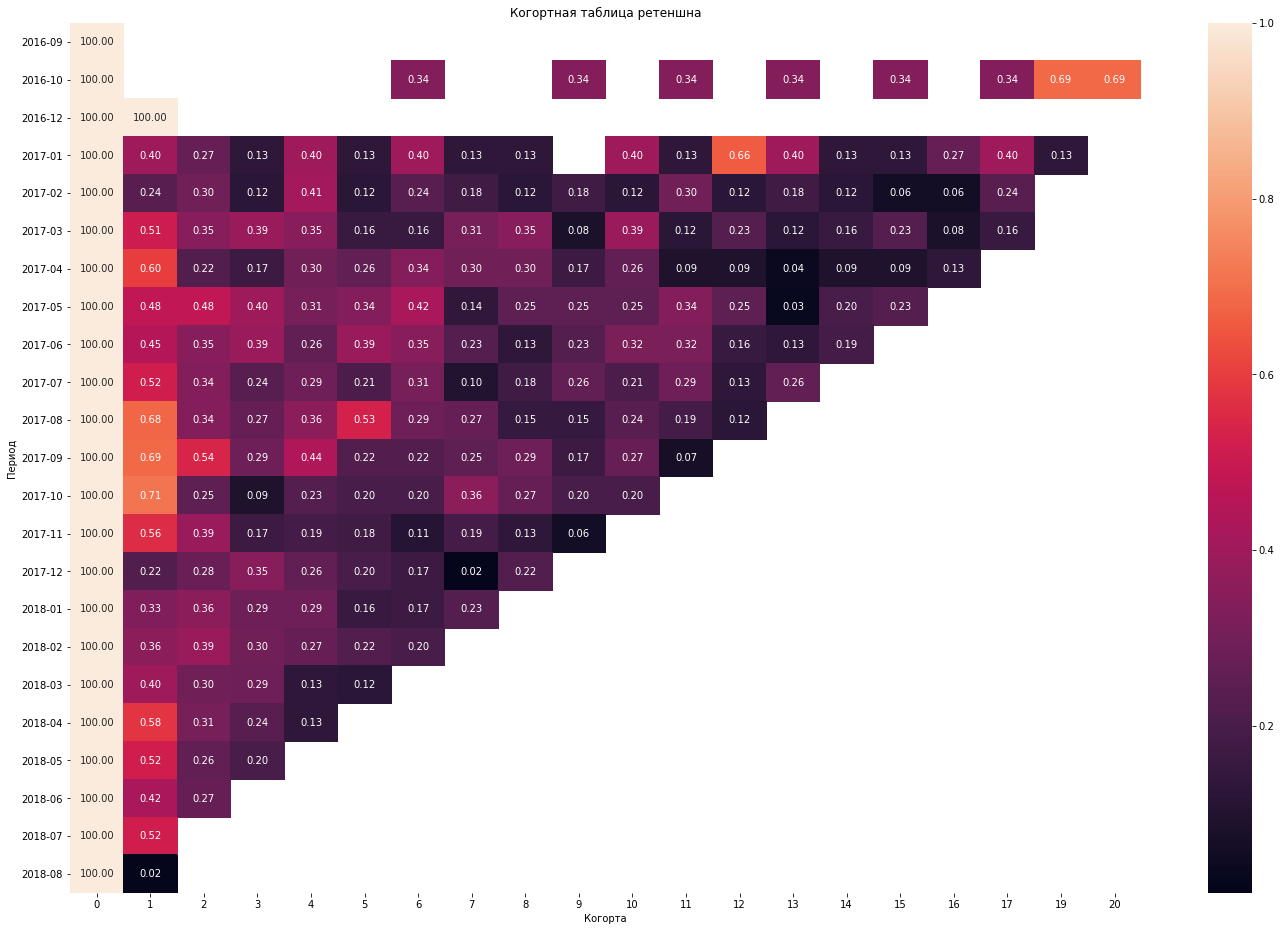

In [197]:
plt.figure(figsize=(24, 16))
plt.title('Когортная таблица ретеншна')
ax_cohorts = sns.heatmap(retention_matrix, mask=retention_matrix.isnull(), annot=True, fmt='.2f', vmin=0.01, vmax=1)
ax_cohorts.set_xlabel('Когорта')
ax_cohorts.set_ylabel('Период')

В промежутке январь-декабрь когорта с наивысшим ретеншном на 3-й месяц - 2017-05 — 0.4


# Задание 6

>***Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.***

Подготовим датафреймы для анализа. Начнем с Recency.   
Отбрасываем заказы, не содержащие достоверной информации, берем только нужные колонки из таблицы orders (время заказа и ключ - customer_id)   
Мерджим это с нужными колонками customers - ключ customer_id и уникальный айди пользователя

In [74]:
recency = orders[orders['order_id'].isin(not_used_orders)==0][['order_purchase_timestamp', 'customer_id']] \
                        .merge(customers[['customer_id', 'customer_unique_id']], how='left', on='customer_id')
recency

,order_purchase_timestamp,customer_id,customer_unique_id
0,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff
1,2018-07-24 20:41:37,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231
2,2018-08-08 08:38:49,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8
3,2017-11-18 19:28:06,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977
4,2018-02-13 21:18:39,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...
98197,2017-03-09 09:54:05,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a
98198,2018-02-06 12:58:58,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660
98199,2017-08-27 14:46:43,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30
98200,2018-01-08 21:28:27,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c


Выбрасываем из таблицы ключ - он больше не нужен   
Группируем по айди пользователя и аггрегируем по последней дате заказа

In [75]:
recency = recency[['customer_unique_id', 'order_purchase_timestamp']].groupby('customer_unique_id') \
                    .agg({'order_purchase_timestamp': max})

In [76]:
recency = recency.reset_index().rename(columns={'order_purchase_timestamp': 'latest_purchase'})

Таймстамп нам не нужен - переводим его в дату.   
Также считаем количество дней с последней покупки - за актуальную дату возьмем дату самого последнего заказа + один день

In [77]:
recency['latest_purchase'] = recency['latest_purchase'].dt.date

In [78]:
recency['days_from_last_purchase'] = (recency['latest_purchase'].max() + dt.timedelta(days=1)) - recency['latest_purchase']
recency

,customer_unique_id,latest_purchase,days_from_last_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,117 days
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,120 days
2,0000f46a3911fa3c0805444483337064,2017-03-10,543 days
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,327 days
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,294 days
...,...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,453 days
94982,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,268 days
94983,ffff371b4d645b6ecea244b27531430a,2017-02-07,574 days
94984,ffff5962728ec6157033ef9805bacc48,2018-05-02,125 days


Теперь посмотрим перцентили - это понадобится для сегментации

In [79]:
recency['days_from_last_purchase'].describe()

count                          94986
mean     244 days 08:21:55.292779988
std      153 days 00:05:04.287229932
min                  1 days 00:00:00
25%                120 days 00:00:00
50%                225 days 00:00:00
75%                353 days 00:00:00
max                730 days 00:00:00
Name: days_from_last_purchase, dtype: object

In [80]:
recency['days_from_last_purchase'].quantile(0.33)

Timedelta('154 days 00:00:00')

In [81]:
recency['days_from_last_purchase'].quantile(0.66)

Timedelta('293 days 00:00:00')

Однако 154 дня с последней покупки это все равно доаольно давно - попробуем вместо 0.33 и 0.66 квантиля взять 25 перцентиль для 1, с 25 по 75 для 2 и выше 75 для 3

In [82]:
def recency_evaluation(days):
    if days <= dt.timedelta(days=120):
        return '3'
    elif days >= dt.timedelta(days=353):
        return '1'
    else:
        return '2'
    

In [83]:
recency['r'] = recency['days_from_last_purchase'].apply(recency_evaluation)
recency

,customer_unique_id,latest_purchase,days_from_last_purchase,r
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,117 days,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,120 days,3
2,0000f46a3911fa3c0805444483337064,2017-03-10,543 days,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,327 days,2
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,294 days,2
...,...,...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,453 days,1
94982,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,268 days,2
94983,ffff371b4d645b6ecea244b27531430a,2017-02-07,574 days,1
94984,ffff5962728ec6157033ef9805bacc48,2018-05-02,125 days,2


Построим распределение дат последней покупки

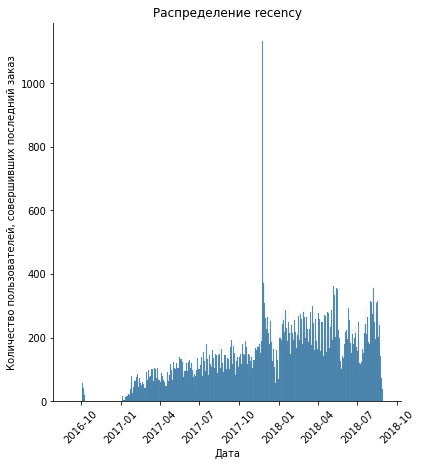

In [112]:
ax_recency = sns.displot(recency.latest_purchase, height=6)
plt.xticks(rotation=45)
ax_recency.set(title = 'Распределение recency',
               xlabel = 'Дата', 
               ylabel = 'Количество пользователей, совершивших последний заказ')

Картина в целом нормальная, но вызывает интерес резкий пик в декабре 2018. Если бы было больше данных о магазине, можно было бы предположить, в чем дело

Следующий на очереди - frequency
Берем точно такой же начальный датафрейм, как и в случае с recency

In [113]:
frequency = orders[orders['order_id'].isin(not_used_orders)==0][['order_purchase_timestamp', 'customer_id']] \
                        .merge(customers[['customer_id', 'customer_unique_id']], how='left', on='customer_id')
frequency

,order_purchase_timestamp,customer_id,customer_unique_id
0,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff
1,2018-07-24 20:41:37,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231
2,2018-08-08 08:38:49,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8
3,2017-11-18 19:28:06,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977
4,2018-02-13 21:18:39,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...
98197,2017-03-09 09:54:05,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a
98198,2018-02-06 12:58:58,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660
98199,2017-08-27 14:46:43,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30
98200,2018-01-08 21:28:27,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c


Группируем по айди пользователя и аггрегируем по количеству заказов

In [114]:
frequency = frequency.groupby('customer_unique_id', as_index=False).agg({'order_purchase_timestamp': pd.Series.count}) \
            .rename(columns={'order_purchase_timestamp': 'total_orders'})

Выводим перцентили, чтобы выбрать, как оценивать frequency

In [115]:
frequency.describe()

,total_orders
count,94986.000000
mean,1.033858
std,0.210807
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,16.000000


Также стоит посмотреть на распределение. Мы это уже делали в первом задании, но листать туда далеко, поэтому продублируем

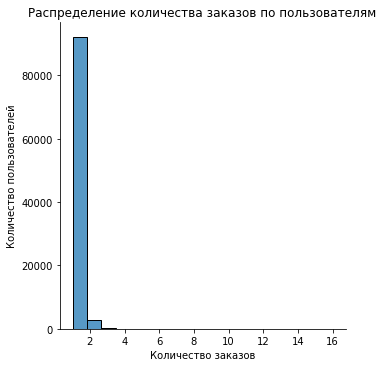

In [123]:
ax_frequency = sns.displot(frequency.total_orders, kde=False)
ax_frequency.set(title='Распределение количества заказов по пользователям', 
                 xlabel='Количество заказов', 
                 ylabel='Количество пользователей')

Большинство пользователей сделали 1 заказ, также немногие сделали 2 и 3. Однако есть выбросы, которые не видно, так как они хоть и большие, их оттеняет абсолютное большинство. Построим еще одно распределение, убрав 1, 2 и 3 заказа 

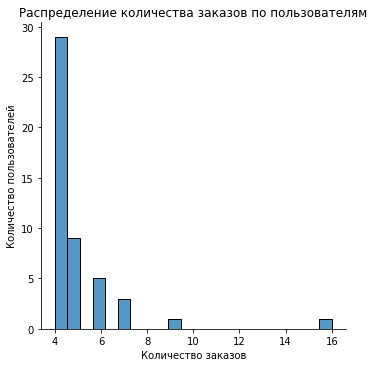

In [124]:
ax_frequency_cut = sns.displot(frequency[frequency['total_orders'] > 3]['total_orders'], kde=False)
ax_frequency_cut.set(title='Распределение количества заказов по пользователям', 
                 xlabel='Количество заказов', 
                 ylabel='Количество пользователей')

Так как большинство пользователей сделали только один заказ, но при этом есть сильные выбросы в 16 заказов, введем такую стистему - 1 заказ - 1 балл, 2 заказа - 2 балла, больше 2 - 3 балла

In [116]:
def frequency_evaluation(orders):
    if orders == 1 or orders == 2:
        return str(orders)
    else:
        return '3'

In [117]:
frequency['f'] = frequency['total_orders'].apply(frequency_evaluation)
frequency

,customer_unique_id,total_orders,f
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1
2,0000f46a3911fa3c0805444483337064,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,1
4,0004aac84e0df4da2b147fca70cf8255,1,1
...,...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,1,1
94982,fffea47cd6d3cc0a88bd621562a9d061,1,1
94983,ffff371b4d645b6ecea244b27531430a,1,1
94984,ffff5962728ec6157033ef9805bacc48,1,1


Теперь займемся monetary   
Так же выкидываем заказы, не несущие полезной информации и мерджим это с таблицей пользователей, чтобы к каждому order_id получить customer_unique_id

In [125]:
monetary = orders[orders['order_id'].isin(not_used_orders)==0][['order_id', 'customer_id']] \
            .merge(customers[['customer_id', 'customer_unique_id']], on='customer_id', how='left') \
            [['customer_unique_id', 'order_id']]
monetary

,customer_unique_id,order_id
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159
...,...,...
98197,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c
98198,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8
98199,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab
98200,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62


Теперь мерджим это с items, чтобы получить цену каждого заказа

In [126]:
monetary = items[items['order_id'].isin(not_used_orders)==0][['order_id', 'price']].merge(monetary, on='order_id', how='left')
monetary

,order_id,price,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,239.90,eb28e67c4c0b83846050ddfb8a35d051
2,000229ec398224ef6ca0657da4fc703e,199.00,3818d81c6709e39d06b2738a8d3a2474
3,00024acbcdf0a6daa1e931b038114c75,12.99,af861d436cfc08b2c2ddefd0ba074622
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,64b576fb70d441e8f1b2d7d446e483c5
...,...,...,...
112096,fffc94f6ce00a00581880bf54a75a037,299.99,0c9aeda10a71f369396d0c04dce13a64
112097,fffcd46ef2263f404302a634eb57f7eb,350.00,0da9fe112eae0c74d3ba1fe16de0988b
112098,fffce4705a9662cd70adb13d4a31832d,99.90,cd79b407828f02fdbba457111c38e4c4
112099,fffe18544ffabc95dfada21779c9644f,55.99,eb803377c9315b564bdedad672039306


теперь группируем по пользователям, чтобы узнать, сколько каждый пользователь оставил у нас

In [127]:
monetary = monetary.groupby('customer_unique_id', as_index=False).agg({'price': sum}) \
                        .rename(columns={'price': 'monetary'})
monetary

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
94979,fffea47cd6d3cc0a88bd621562a9d061,64.89
94980,ffff371b4d645b6ecea244b27531430a,89.90
94981,ffff5962728ec6157033ef9805bacc48,115.00


смотрим перцентили

In [128]:
monetary['monetary'].describe()

count    94983.000000
mean       142.071747
std        216.074999
min          0.850000
25%         47.900000
50%         89.890000
75%        155.000000
max      13440.000000
Name: monetary, dtype: float64

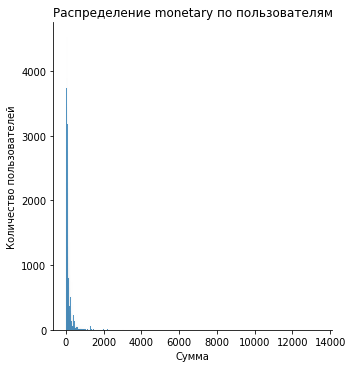

In [130]:
ax_monetary = sns.displot(data=monetary, x='monetary')
ax_monetary.set(title='Распределение monetary по пользователям', 
                xlabel='Сумма', 
                ylabel='Количество пользователей')

Можно видеть, что распределение очень неоднородное - большинство оставили очень мало, при этом есть огромные выбросы. Поэтому выберем такую систему: до 155 рублей - 1 (75 перцентиль), до 1000 рублей - 2, выше 1000 - 3

In [131]:
def monetary_evaluation(money):
    if money < 155:
        return '1'
    elif money > 1000:
        return '3'
    else:
        return '2'

In [132]:
monetary['m'] = monetary['monetary'].apply(monetary_evaluation)
monetary

,customer_unique_id,monetary,m
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1
2,0000f46a3911fa3c0805444483337064,69.00,1
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1
4,0004aac84e0df4da2b147fca70cf8255,180.00,2
...,...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,3
94979,fffea47cd6d3cc0a88bd621562a9d061,64.89,1
94980,ffff371b4d645b6ecea244b27531430a,89.90,1
94981,ffff5962728ec6157033ef9805bacc48,115.00,1


Соберем эти метрики в единый датафрейм и поменяем местами колонки чтобы визуально было понятнее


In [133]:
rfm = recency.merge(frequency, on='customer_unique_id', how='left') \
                .merge(monetary, on='customer_unique_id', how='left')
rfm

,customer_unique_id,latest_purchase,days_from_last_purchase,r,total_orders,f,monetary,m
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,117 days,3,1,1,129.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,120 days,3,1,1,18.90,1
2,0000f46a3911fa3c0805444483337064,2017-03-10,543 days,1,1,1,69.00,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,327 days,2,1,1,25.99,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,294 days,2,1,1,180.00,2
...,...,...,...,...,...,...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,453 days,1,1,1,1570.00,3
94982,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,268 days,2,1,1,64.89,1
94983,ffff371b4d645b6ecea244b27531430a,2017-02-07,574 days,1,1,1,89.90,1
94984,ffff5962728ec6157033ef9805bacc48,2018-05-02,125 days,2,1,1,115.00,1


In [136]:
rfm = rfm[['customer_unique_id', 'latest_purchase', 'total_orders', 'monetary', 'r', 'f', 'm']]

Сделаем колонку с общей rfm-оценкой

In [137]:
rfm['rfm'] = rfm['r'] + rfm['f'] + rfm['m']
rfm

,customer_unique_id,latest_purchase,total_orders,monetary,r,f,m,rfm
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90,3,1,1,311
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,69.00,1,1,1,111
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00,2,1,2,212
...,...,...,...,...,...,...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,1,1570.00,1,1,3,113
94982,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,1,64.89,2,1,1,211
94983,ffff371b4d645b6ecea244b27531430a,2017-02-07,1,89.90,1,1,1,111
94984,ffff5962728ec6157033ef9805bacc48,2018-05-02,1,115.00,2,1,1,211


у каждого показателя 3 варианта, показателей всего 3, значит, в теории, 3^3 = 27 сегментов должно получиться. проверим это

In [147]:
rfm['rfm'].nunique()

27

Теперь проясним сегментацию и прикинем возможные стратегии для кластеров.   
***Уходящие клиенты:***   
111, 112, 113 - давно совершили один заказ - отправляем цепочку реактивации   
121, 122, 123 - совершили 2 покупки, давно перестали покупать - реактивационная рассылка + опрос   
131, 132, 133 - совершили 3 или более покупок, давно перестали покупать - реактиванионная рассылка + опрос + предлагаем бонусы   
***Спящие клиенты:***   
211, 212, 213 - совершили одну покупку сравнительно недавно - попробуем расшевелить их рассылкой с акциями   
221, 222, 223 - совершили 2 покупки, полследняя была не так давно - так же рассылка с акциями   
231, 232, 233 - совершили 3 и более покупок, сравнительно недавно пропали, их обязательно надо вернуть - рассылка с акциями + опрос   
***Активные клиенты:***   
311, 312 - новые клиенты, маленький или средний чек - welcome-рассылка с описанием наших преимуществ   
313 - новые клиенты с высоким чеком - в дополнение к welcome-рассылке можно добавить специальное предложение   
321, 322 - клиенты недавно вернулись, маленький или средний чек - рассылка с сопутствующими товарами
323 - недавно вернулись, высокий чек - не будем им досаждать :)   
331, 332 - постоянные клиенты с маленьким и средним чеком - сопутствующие товары и специальные предложения   
333 - наши VIP - особые предложения

In [139]:
def strategy(score):
    if score in ['111', '112', '113']:
        return 'цепочка реактивации'
    elif score in ['121', '122', '123']:
        return 'цепочка реактивации + опрос'
    elif score in ['131', '132', '133']:
        return 'цепочка реактивации + опрос + бонусы'
    elif score in ['211', '212', '213', '221', '222', '223']: 
        return 'рассылка с акциями'
    elif score in ['231', '232', '233']:
        return 'рассылка с акциями + опрос'
    elif score in ['311', '312']:
        return 'welcome-рассылка'
    elif score == '313':
        return 'welcome-рассылка + спец. предложение'
    elif score in ['321', '322']:
        return 'рассылка с сопутствующими товарами'
    elif score == '323':
        return 'не трогаем'
    elif score in ['331', '332']:
        return 'рассылка с сопутствующими товарами + спец. предложение'
    elif score == '333':
        return 'особые предложения'

In [143]:
def segment(recency):
    if recency == '1':
        return 'уходящий'
    elif recency == '2':
        return 'спящий'
    else:
        return 'активный'

In [144]:
rfm['segment'] = rfm['r'].apply(segment)
rfm

,customer_unique_id,latest_purchase,total_orders,monetary,r,f,m,rfm,segment,strategy
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90,3,1,1,311,активный,welcome-рассылка
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90,3,1,1,311,активный,welcome-рассылка
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,69.00,1,1,1,111,уходящий,цепочка реактивации
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99,2,1,1,211,спящий,рассылка с акциями
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00,2,1,2,212,спящий,рассылка с акциями
...,...,...,...,...,...,...,...,...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,1,1570.00,1,1,3,113,уходящий,цепочка реактивации
94982,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,1,64.89,2,1,1,211,спящий,рассылка с акциями
94983,ffff371b4d645b6ecea244b27531430a,2017-02-07,1,89.90,1,1,1,111,уходящий,цепочка реактивации
94984,ffff5962728ec6157033ef9805bacc48,2018-05-02,1,115.00,2,1,1,211,спящий,рассылка с акциями


In [145]:
rfm['strategy'] = rfm['rfm'].apply(strategy)
rfm

,customer_unique_id,latest_purchase,total_orders,monetary,r,f,m,rfm,segment,strategy
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90,3,1,1,311,активный,welcome-рассылка
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90,3,1,1,311,активный,welcome-рассылка
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,69.00,1,1,1,111,уходящий,цепочка реактивации
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99,2,1,1,211,спящий,рассылка с акциями
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00,2,1,2,212,спящий,рассылка с акциями
...,...,...,...,...,...,...,...,...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,1,1570.00,1,1,3,113,уходящий,цепочка реактивации
94982,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,1,64.89,2,1,1,211,спящий,рассылка с акциями
94983,ffff371b4d645b6ecea244b27531430a,2017-02-07,1,89.90,1,1,1,111,уходящий,цепочка реактивации
94984,ffff5962728ec6157033ef9805bacc48,2018-05-02,1,115.00,2,1,1,211,спящий,рассылка с акциями


Составим тепловую карту по r и f, цветом будет выделена медиана monetary, так как, как мы уже выяснили, распредение не позволяет использовать среднее - слишком большие выбросы

Text(33.0, 0.5, 'Recency')

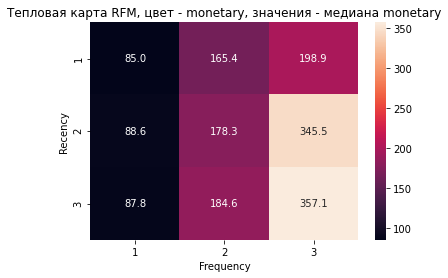

In [151]:
rfm_heat = rfm.pivot_table(index='r', columns='f', values='monetary', aggfunc='median')
ax_rfm_heat = sns.heatmap(rfm_heat, annot=True, fmt='.1f')
ax_rfm_heat.set_title('Тепловая карта RFM, цвет - monetary, значения - медиана monetary')
ax_rfm_heat.set_xlabel('Frequency')
ax_rfm_heat.set_ylabel('Recency')

Как можно видеть, наибольшая monetary у людей с frequency 3, что объясняется тем, что monetary мы считали вообще, а не за конкретный период ввиду того, что у большинства покупателей всего один заказ.

Проверим распреденение пользователей по сегментам

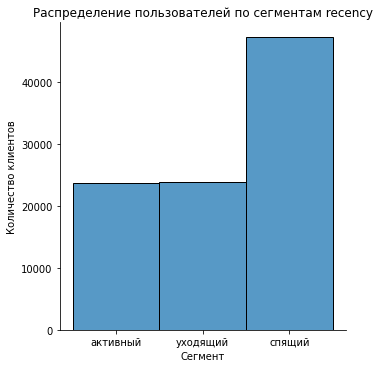

In [153]:
ax_rfm_segments = sns.displot(rfm['segment'])
ax_rfm_segments.set(title='Распределение пользователей по сегментам recency', 
                    xlabel='Сегмент',
                    ylabel='Количество клиентов')

Большинство клиентов спят. Значит, нужно проводить активные рассылки и акции, все это уже указано в стратегиях